# 垃圾邮件的分类

### 1、问题研究背景
“垃圾邮件”的概念是多种多样的：产品/网站的广告，快速赚钱的计划，连锁信，色情内容……我们收集的垃圾邮件中，有来自我们的邮局主管和提交过垃圾邮件的个人。我们收集的非垃圾邮件来自归档的工作和个人电子邮件，因此，“乔治”一词和区域代码“ 650”表示非垃圾邮件。这些在构建个性化垃圾邮件过滤器时很有用。人们要么必须掩盖此类非垃圾邮件指标，要么必须收集大量非垃圾邮件来生成通用垃圾邮件过滤器。因此通过大量数据来训练通用性较强的垃圾邮件过滤器是十分必要的。

### 2、数据介绍
数据来源于kaggle上的数据集，网站为https://www.kaggle.com/somesh24/spambase
，数据集中的各个属性实际意义为：
最后一列表示该电子邮件是否被视为垃圾邮件（1）或不被视为垃圾邮件（0）即未经请求的商业电子邮件。
单词频率WORD =电子邮件中与WORD匹配的单词的百分比，即100 *（WORD在电子邮件中出现的次数）/电子邮件中的单词总数。在这种情况下，“单词”是由非字母数字字符或字符串结尾界定的任何字母数字字符字符串。
类型为char freq的6个连续实数[0,100]属性CHAR =电子邮件中与CHAR匹配的字符百分比，即100 *（出现CHAR的次数）/电子邮件中的总字符数
1个大写运行类型的连续实数[1，…]属性length_average =不间断的大写字母序列的平均长度
1个大写运行类型的连续整数[1，…]属性length_longest =最长不间断的大写字母序列的长度
1个大写运行类型的连续整数[1，…]属性length_total =不间断的大写字母序列的长度之和=电子邮件中大写字母的总数
最后一列class表示该电子邮件是否被视为垃圾邮件（1）或不被视为垃圾邮件（0）即未经请求的商业电子邮件。

In [1]:
#导入所需要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_roc_curve

In [2]:
#读入数据
df = pd.read_csv("C:/Users/一叶孤城/Desktop/常用/商务数据分析/spambase_csv.csv")

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 3、数据预处理


In [4]:
#df.shape
#df.columns
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

可以看到数据一共有58个属性，word属性是指邮件中包含该单词的百分比，char属性是指邮件中包含该字符串的比率，capital属性是指不间断的大写字母序列的长度，有4601条记录，数据全部为float型和int型，并没有缺失值。

In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


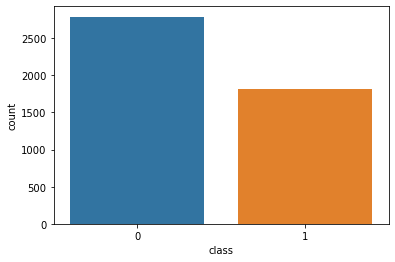

In [6]:
sns.countplot(x='class', data=df)
plt.show()

可以看到，正负样本的比例大概是2：3，样本类别比较均衡。

### 4、模型构建
#### 4.1、特征筛选
直接简单的方法是直接按照属性之间的相关性强弱来粗筛特征。

In [7]:
#画一下相关系数的海温图
correlation = abs(df.corr()["class"].sort_index()).reset_index().rename(columns= {"index":"feature"})
#plt.figure(figsize = (30,30))
#sns.heatmap(df.corr(), annot = True)
#plt.show ()
#这个图看着十分拥挤，下面对这些属性按照相关属性的强弱进行排序
correlation.sort_values("class", ascending = False)

,feature,class
9,class,1.000000
57,word_freq_your,0.383234
10,word_freq_000,0.334787
50,word_freq_remove,0.332117
5,char_freq_%24,0.323629
56,word_freq_you,0.273651
29,word_freq_free,0.263215
20,word_freq_business,0.263204
31,word_freq_hp,0.256723
2,capital_run_length_total,0.249164


In [25]:
#按照相关性强弱对特诊进行筛选
estimated_features = correlation[correlation["class"] > 0.097375].feature.to_list()
#可以看到经过筛选后的相关系数强度大于0.097375的特征有43个
len(estimated_features)

43

按照相关性强弱对特诊进行筛选，可以看到经过筛选后的相关系数强度大于0.097375的特征有43个


#### 4.2、逻辑回归分类模型

In [10]:
# 下面建立逻辑回归来进行分类
X = df.drop("class", axis = 1)
y = df["class"]

# Scaling the values
std_sca  = StandardScaler()
X=std_sca.fit_transform(X)

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
#pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
#kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Spliting the data into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 


# Conduct k-fold cross-validation
cv_results = cross_val_score(logit, X_train,y_train, cv=10) # , n_jobs=-1,scoring="accuracy",Use all CPU cores

# Calculate mean
print (" The Mean Score is ", cv_results.mean())

 The Mean Score is  0.9258152173913043


可以看到，利用10折交叉验证，在训练集上的平均得分为0.9258，是比较好的分数，接下来测试模型在测试集上的泛化能力。

In [11]:
logit.fit(X_train, y_train)
# Sample prediction
y_pred = logit.predict(X_test)
print("Accuracy Score on the testing set ", metrics.accuracy_score(y_test, y_pred))

Accuracy Score on the testing set  0.9272529858849077


试验得到模型在测试集上的得分为0.9273，与训练集上的得分是十分近似的，所以直观来看，该模型并没有发生过拟合现象。

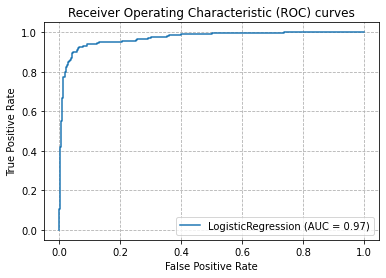

In [24]:
plot_roc_curve(logit, X_test, y_test)
plt.title('Receiver Operating Characteristic (ROC) curves')
plt.grid(linestyle='--')

从roc曲线和auc数值来看，逻辑回归分类器的效果是非常好的。在以后新样本的分类中可以使用logit.predict（X）对该样本的类别进行分类。
